<a href="https://colab.research.google.com/github/duchaba/aud3_augmentation_data_deep_dive/blob/main/AUD3_augmentation_data_deep_dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# OPTIONAL
# For Google Colab, (1) Open the "concole", e.g. right-click and inspect, (2) Copy the below scripts (from line #10 to #17) and run it.
#
# If you know how to hack Google Colab Jupyter notebook and run "javascripts" as-is below, 
#i.e., without the need for opening up the console, please share it with me.
#
# The Javascript is to highlight the code cells' input and output and the code-cells you have executed.
#
%%js
var head = document.head || document.getElementsByTagName("head")[0];
var style = document.createElement("style");
var css = ".inputarea.code{border-left: 4px solid #20c997;}.cell.focused .inputarea.code{border-left: 4px solid #d63384;}.cell .output{border-left: 4px solid #ffc107;}";
css = css + ":root { --colab-fresh-execution-count-color: #d63384;}";
css = css + ".markdown blockquote {border-left: 10px solid #fd7e14 !important;border-radius: 10px 0 0 10px;padding: 1em 1em 1em 1em;border-bottom: 1px solid #343845}"
css = css + " h1,h2,h3,h4,h5 {font-family:serif !important;}"
css = css + "h1{color:#e83e8c !important;;} h2{color:#20c997 !important;font-size:120%;} h3{color:#fd7e14 !important;font-size:120%;} h4{color:#6610f2 !important;}"
head.appendChild(style);
style.type = "text/css";
style.appendChild(document.createTextNode(css));


<IPython.core.display.Javascript object>

# 1.0 |- Introduction | Augmentation Data Deep Dive (AUD3)

Welcome to the “Augmentation Data Deep Dive” (AUD3) project. It is another journey in the “Demystify AI” series. 

The only thing these journeys have in common is the problems are taken from the real-world Artificial Neural Network (ANN) project. I have worked on them, coded them, cried over them, and sometimes had a flash-of-insight or an original thought about them.

The journeys are a fun and fascinating insight into the daily working of an AI Scientist and Big-Data Scientist. They are for colleagues and AI students, but I hope that you, a gentle reader, would enjoy it too. 

The logic behind data augmentation is uncomplicated. You need more pictures to increase the ANN model accuracy, and data augmentation gives you more images. 

The AUD3 is a hackable, step-by-step Jupyter Notebook. It is for learning about data augmentation and selecting the correct parameters in the ANN image-classification and image-segmentation projects. You can skip ahead to the result-cells and not read the math and the code-cells. The math is elementary, and coding is straightforward logic, so try it out. You might enjoy “hacking” along the journey. 

Data augmentation increases the training images by a factor of 2 to 16 or more. For ANN, that means the model achieves better accuracy with more epoch and without over-fitting. 

For example, I was working on an AI project for a large casino hotel. The goal is to classify every customer into one of the 16 categories as they walk through the door. In other words, it is not to identify that guy walking through the door is “Duc Haba,” but to classify him as a “whale (A-1)” category, i.e., a big spender. 

As you have guessed, the first and most significant problem is the lack of labeled pictures. I need millions of tagged photos because of human diversity in race, ethnicity, clothing, different camera angle, and so on. 

ANN is not a ruled-based expert system. For example, a person wearing a Rolex watch is an “A-1”, or a guy with no shoe and no shirt is a “D-4” category. ANN does not use rules, so it needs millions of labeled images to train and to generalize so the ANN model can classify a guy who enters the casino for the first time correctly. In ANN’s lingual, it means the ANN model is not over-fitting. 

I classify the AUD3 as a "sandbox" project. In other words, it is a fun, experimental project focusing on solving one problem.






><center><h2><i>So if you are ready, let's take a collective calming breath …  … and begin.</i></h2></center>

# 2.0 |- The Journey




- As with the previous journey, the first step is to choose and name your dog companion. With the project code name AUD3, the natural name has to be “Wallaby.” 

- Typically a dog name is chosen, e.g., "Lefty," "Roosty," or "Eggna," but be warned, don't name it after your cat because a "cat" will not follow any commands.

- If you are serious about learning augmenting data, start hacking by changing the companion name to your preference. Jupyter notebook allows you to add notes, add new codes, and hack Wallaby’s code. 

- If you are a friend tagging along, you will like Wallaby. He is a friendly, helpful dog. He will do all the tedious work in good spirits, and he likes to hop around. 

- As a good little programmer, Wallaby (or insert your companion name here) starts by creating an object or class.

![wallaby](https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/wallaby3.jpg?raw=true)

## 2.1 | Wallaby's "River" Coding Style

- Wallaby uses the "river" coding style.

- The style uses a full library name, sub-class, and following by the function name. Jupyter notebook has auto-complete, so Wallaby would not misspell long variable and function name. 

- Wallaby is NOT using the global-space, such as "import numpy *" or using the shorten name like "import matplotlib.pyplot as ptl.” Instead he is using the full {river} name as in “numpy.random.randint().”

- Furthermore, Wallaby shies away from using Python language-specific syntax shorthand, such as the “assigned if” statement construct. He likes to write the Python code using standard Python libraries and not relying on exotic packages. 

- The primary reason for using the “river” coding style coupled with a descriptive naming convention is that it is easier to read, hack, and translate to Swift or Javascript.

- For any sandbox project, Wallaby is in the exploration mode, and therefore, he will refactor and optimize the code afterward. When Wallaby using [Atom IDE](htpps://atom.io) to upload the code to GitHub, he may refactor them to make them run faster, but not for syntax compaction or syntax shorthand. 


## 2.2 | Wallaby Class

In [2]:
# import standard libraries
import numpy
import pathlib
import os
import pandas
import matplotlib

In [3]:
class AUD3(object):
  #
  # initialize the object
  def __init__(self, name="Wallaby"):
    self.author = "Duc Haba"
    self.name = name
    self._ph()
    self._pp("Hello from", self.__class__.__name__)
    self._pp("Code name", self.name)
    self._pp("Author is", self.author)
    self._ph()
    return
  #
  # pretty print output name-value line
  def _pp(self, a, b):
    print("%40s : %s" % (str(a), str(b)))
    return
  #
  # pretty print the header or footer lines
  def _ph(self):
    print("-" * 40, ":", "-" * 40)
    return
  #
  # dance
  def dance_happy(self):
    char = "        _=,_\n    o_/6 /#\\\n    \\__ |##/\n     ='|--\\\n       /   #'-.\n"
    char = char + "       \\#|_   _'-. /\n        |/ \\_( # |\" \n       C/ ,--___/\n"
    print(char)
    self._ph()
    return
# ---end of AUD3 class

In [4]:
# Let start
wallaby = AUD3("Wallaby")

---------------------------------------- : ----------------------------------------
                              Hello from : AUD3
                               Code name : Wallaby
                               Author is : Duc Haba
---------------------------------------- : ----------------------------------------


In [5]:
# dance baby dance
wallaby.dance_happy()

        _=,_
    o_/6 /#\
    \__ |##/
     ='|--\
       /   #'-.
       \#|_   _'-. /
        |/ \_( # |" 
       C/ ,--___/

---------------------------------------- : ----------------------------------------


- The following is a clean version. Wallaby cleans up the tried-and-errors cells, but please don't let it stop you from inserting your code-cells and notes as we make this journey together. 

- When copying the code into the Atom's project, Wallaby would add the methods during the class definition, but in a notebook, he will hack-it and add new functions as need it. 

In [6]:
# Hack it!
# add_method() is copy from Michael Garod's blog, 
# https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6
# AND correction by: Филя Усков
#
import functools
def add_method(cls):
  def decorator(func):
    @functools.wraps(func) 
    def wrapper(self, *args, **kwargs): 
      return func(self,*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator

## 2.3 | Detour to Find Our Friend Monty

- Monty is like Wallaby. He is a Python class refactored in the Atom project and stored in GitHub. 

- Monty is an alpha-dog, and therefore, he follows the same methodology. Hacked it in a Jupyter notebook and then copy and refactor in a Python Atom project.

- Monty is not a public Github project at this stage. However, Monty's code exists in many of Duc Haba's sandbox projects on Github.

- Monty uses "[fast.ai](https://fasta.ai)" library version 1.0.62.x from Jeremy Howard, Rachel Thomas, and Sylvain Gugger. Fast.ai library uses PyTorch version 1.6.x and Python 3.6.9.

- For this journey, Monty ability to draw 2D, 3D graphs, and image-cleaning will be handy. They were from previous journies, the "[Demystify Python 2D Charts](https://www.linkedin.com/pulse/demystify-python-charts-hackable-step-by-step-jupyter-duc-haba/)," and the "[3D Visualization](https://www.linkedin.com/pulse/python-3d-visualization-hackable-step-by-step-jupyter-duc-haba/)" sandbox projects.

In [7]:
%%capture out_1
# load in fastai and pytorch. It is optional if are coding on your labtop
# load in fastai at May 1 2020 version
!pip install --upgrade git+https://github.com/duchaba/fastai.git
# !pip install --upgrade git+https://github.com/duchaba/monty_NOT_AVAILABLE

# import Monty and create a monty instant. The preference is NOT using global space
import d0hz.fastai_util 
monty = d0hz.fastai_util.base_monty()

In [8]:
# double checked
monty.print.sys_info()

---------------------------------------- : ----------------------------------------
                             System time : 2020/12/12 05:14
                                Platform : linux
                          Python version : 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
                         PyTorch version : 1.7.0+cu101
                     Fastai version is:  : 1.0.62.dev0
                           Monty version : 0.6.0
                               CPU count : 4
                              *CPU speed : NOT available
                               RAM total : 25.51 Gb
                                RAM free : 24.44 Gb, 95.8%
                                GPU-Cuda : True
                        Disk space total : 147.15 Gb
                         Disk space free : 114.95 Gb, 78.1%
                      Current directory: : /content
             Python import packages path : Full path below...
                                       + : 
                     

## 2.4 | Fetch Images Data

- Wallaby has a companion named Monty. He will do all the dirty works that do not directly pertain to this journey. If we spend time teaching Wallaby, then it will distract from the AUD3 journey.

- Wallaby encourages you to hack the notebook, and use your image data set.

- His first task is as follows.

1. Fetch the farm animal image set.

2. Fetch the city image set.

3. Fetch the people faces image set.

4. Fetch the satellite image set.

- Wallaby randomly pulls the images from "Google" or "Bing" image-searches. He uses the Chrome web store "[Download All Images](https://chrome.google.com/webstore/detail/download-all-images/nnffbdeachhbpfapjklmpnmjcgamcdmm)" extension to download and pack them into a zip file. 

- Wallaby claims <u>no rights</u> on these pictures. He uses them only for research purposes. 


In [9]:
import requests
import zipfile
# fetch data from url
@add_method(AUD3)
def _fetch_external_file(self,src_url, dst_path):
  ext_file = requests.get(src_url, allow_redirects=True)
  self._pp("Response Status Code " + str(ext_file.status_code), ext_file.reason)
  local_file = open(dst_path,mode="wb")
  local_file.write(ext_file.content)
  local_file.close()
  return dst_path
#
#
# unzip file
@add_method(AUD3)
def _unpack_zipfile(self, src,dst):
  with zipfile.ZipFile(src, "r") as zip_ref:
    zip_ref.extractall(path=dst)
  return
#
#
# fetch data
@add_method(AUD3)
def fetch_data(self):
  #set up
  self.img_ext_faces_url = "https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/faces.zip?raw=True"
  # create the "data"
  self.data_path = pathlib.Path("data")
  if os.path.isdir(self.data_path) == False:
    os.mkdir(self.data_path)
  dst = self.data_path.joinpath("faces.zip")
  # header
  self._ph()
  self._pp("Fetch", "Image data sets")
  self._pp("Destination: "+str(dst), "Source: " + self.img_ext_faces_url)
  # fetch faces
  self.img_path = self.data_path.joinpath("img")
  self._fetch_external_file(self.img_ext_faces_url,dst)
  self._unpack_zipfile(dst,self.img_path)
  self._pp("Unpack "+str(dst) + " at", self.img_path)
  # fetch cityscape
  self.img_ext_cityscape_url = "https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/cityscape.zip?raw=True"
  dst = self.data_path.joinpath("cityscape.zip")
  self._pp("Destination: "+str(dst), "Source: " + self.img_ext_cityscape_url)
  self._fetch_external_file(self.img_ext_cityscape_url,dst)
  self._unpack_zipfile(dst,self.img_path)
  self._pp("Unpack "+str(dst) + " at", self.img_path)
  #
  # fetch landscape
  self.img_ext_landscape_url = "https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/landscape.zip?raw=True"
  dst = self.data_path.joinpath("landscape.zip")
  self._pp("Destination: "+str(dst), "Source: " + self.img_ext_landscape_url)
  self._fetch_external_file(self.img_ext_landscape_url,dst)
  self._unpack_zipfile(dst,self.img_path)
  self._pp("Unpack "+str(dst) + " at", self.img_path)
  #
  self._ph()
  return 

In [10]:
# do it
wallaby.fetch_data()

---------------------------------------- : ----------------------------------------
                                   Fetch : Image data sets
             Destination: data/faces.zip : Source: https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/faces.zip?raw=True
                Response Status Code 200 : OK
                Unpack data/faces.zip at : data/img
         Destination: data/cityscape.zip : Source: https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/cityscape.zip?raw=True
                Response Status Code 200 : OK
            Unpack data/cityscape.zip at : data/img
         Destination: data/landscape.zip : Source: https://github.com/duchaba/aud3_augmentation_data_deep_dive/blob/main/scratch/landscape.zip?raw=True
                Response Status Code 200 : OK
            Unpack data/landscape.zip at : data/img
---------------------------------------- : ----------------------------------------


- That was easy-peasy-lemon-squeezy. Wallaby is an excellent fetching-dog. Imagine if you choose a cat as your companion on this journey. First, a cat will not listen to the command "fetch." If a miracle of miracle happens, a cat follows your order. Then he will most likely come back with a dead bird or not come back at all.

## 2.5 | Inspect Images

- Wallaby relies on Monty to do the photos inspection and cleaning. It is a prelude to doing data augmentation, but it is not essential to teach Wallaby. It would be distracted from the AUD3 journey. 

- Send Wallaby’s human companion an email or post a comment if you want Wallaby to do a Jupyter notebook sandbox project about image inspection and cleaning.

- Wallaby repeatedly runs below code-cells to see a random image thumbnail.


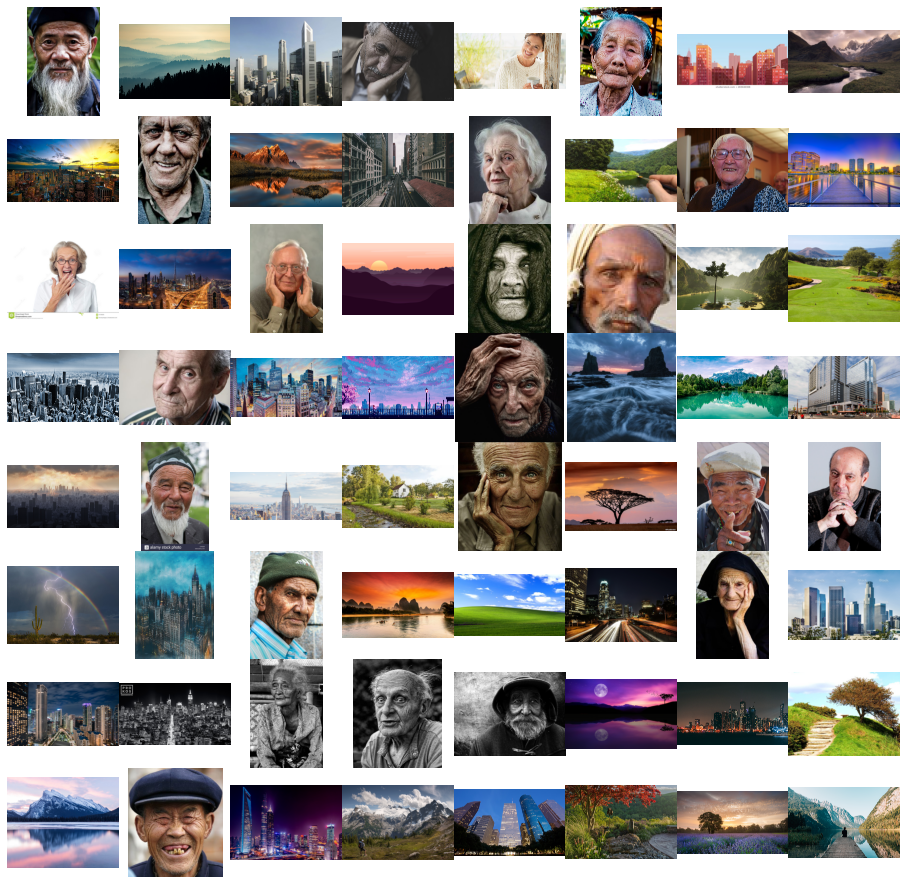

In [11]:
# view images thumbnail (run it repeatly)
monty.draw.thumbnail_collage(wallaby.img_path)

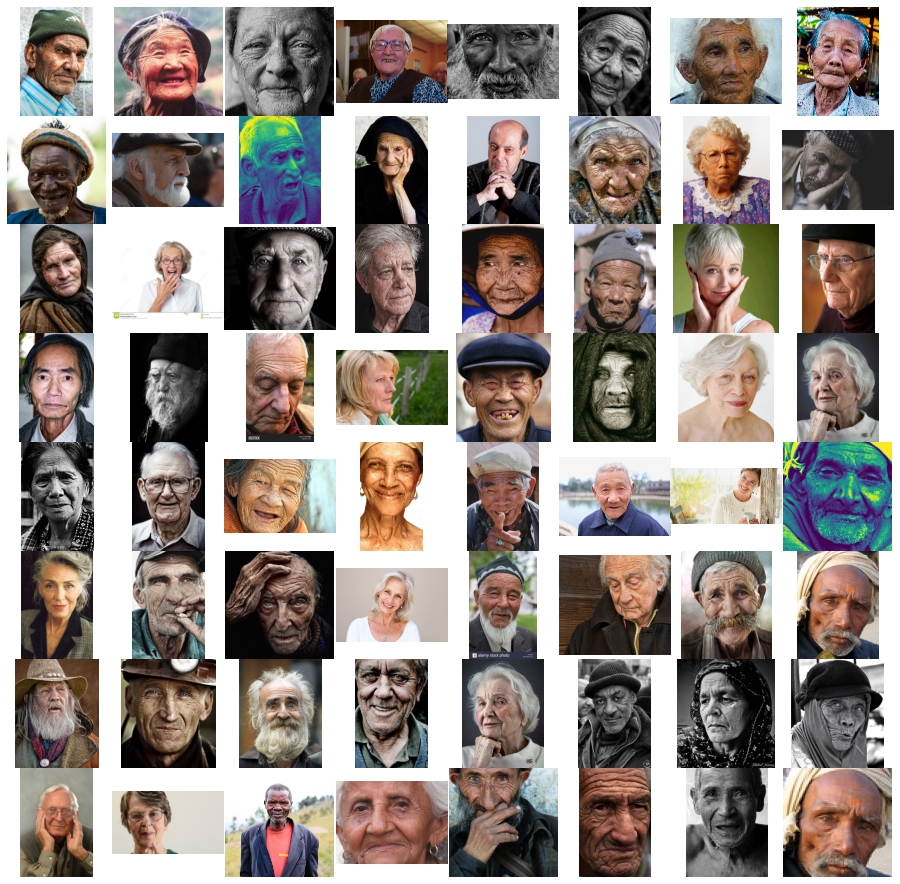

In [12]:
# view just faces thumbnail (run it repeatly)
monty.bag.img_files = None # reset the thumbnail collection
monty.draw.thumbnail_collage(wallaby.img_path.joinpath("faces"))

- Wallaby wants to inspect one file at a time.

In [13]:
# print inspect one image (randomly)
@add_method(AUD3)
def print_inspect_image(self):
  files = monty.fetch.file_name(self.img_path)
  max = len(files)
  idx = numpy.random.randint(0,max)
  monty.print.inspect_image(files[idx]) 
  monty.draw.images(files[idx])
  return

---------------------------------------- : ----------------------------------------
 Image size (row/h, col/width, [chanel]) : (2917, 2917, 3)
                              Image mode : RGB
                           Channel value : 3
                        (top left 8x8) R : Value below...
                                       + : [18 18 18 18 18 18 18 18]
                                       + : [18 18 18 18 18 18 18 18]
                                       + : [18 18 18 18 18 18 18 18]
                                       + : [18 18 18 18 18 18 18 18]
                                       + : [18 18 18 18 18 18 18 18]
                                       + : [18 18 18 18 18 18 18 18]
                                       + : [18 18 18 18 18 18 18 18]
                                       + : [18 18 18 18 18 18 18 18]
                        (top left 8x8) B : Value below...
                                       + : [117 117 117 117 117 117 117 117]
                    

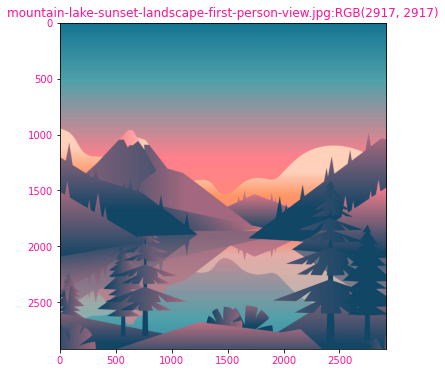

In [14]:
# do it (run it repeatly)
wallaby.print_inspect_image()

-a 

## 2.6 | Clean The Images (Optional?)

- Data cleaning and data normalization may be optional in some cases. Still, Wallaby found that the ANN model will train faster with better accuracy when all images are the same size and square shape.

- Data cleaning does not affect the data augmentation outcome, but Wallaby is an organized nutcase. He likes things square and needly lineup. And since Monty knows how to do cleaning, it will not distract from the journey goals. 

- Once again, if you like to see an in-depth Jupyter Notebook about data cleaning (or cleansing), labeling, aggregating, identifying, and wrangling, contact Wallaby human companion.

- Wallaby starts with picking the image size. It is not as easy as it sounds because the photo’s size is tightly coupled with the goal of the ANN classification model and the subject matter. If the goal is simple as to classify handwriting digit, then 64x64 pixel is sufficient.

- What is the optimal photo size for ANN classification of the ethnicity of older adults faces? Clearly, the 2024x3040 pixel size is too big, and the 64x64 pixel size is too small. Should it be 400x400, 800x800 or 1024x1024 pixel size? Or does it even matter if Wallaby chooses any of the mid-range sizes? Is higher resolution always yield a better accuracy rate? There is no clear answer to any of the above questions. 

- There are practical considerations that need to take into account. The photo size 2024x3040 pixel yields 6,152,960 input nodes per image. When Wallaby multiplies the number of input nodes with the batch-size, the epoch count, and the number of layers in the ANN architecture, the result is a pretty large number. There is no GPU card with that big of RAM available on the open market. Eight, twelve, and sixteen Gigabytes of GPU RAM is the norm for ANN projects. 

- Wallaby hates to willy-nilly choose a size because he is trained as a canine computer scientist and not a psychologist. Maybe he should wait for his friend Magpiena to complete her master thesis. :-)

- For now, Wallaby chooses the size 448x448 pixel size because ResNet architecture uses the formular (2^n * 7) where “n” is an integer starting with one, i.e. (2^6 * 7) = 448. Wally wants all photo to be square and centered. 



In [15]:
# Monty clean
wallaby.img_size = 448
monty.clean.square_images(wallaby.img_path, wallaby.img_size)

---------------------------------------- : ----------------------------------------
                               Directory : data/img
                       Result image size : 448x448
               Total squared image count : 222
---------------------------------------- : ----------------------------------------


True

- Wallaby is right. Monty cleans well. While at it, the file names are too long, and there is no embedded information in the file name, so Wallaby wants to make them all nice and tidy. :-)



In [16]:
# Monty normalize file name
@add_method(AUD3)
def clean_normalize_filename(self):
  monty.clean.normalize_name(self.img_path.joinpath("faces"),head="face")
  monty.clean.normalize_name(self.img_path.joinpath("cityscape"),head="city")
  monty.clean.normalize_name(self.img_path.joinpath("landscape"),head="land")
  return

In [17]:
# shorten and tidy file name
wallaby.clean_normalize_filename()

---------------------------------------- : ----------------------------------------
                 Total file rename count : 76
                           Original name : data/img/faces/Makeup-for-elderly-women.jpg
                                New name : data/img/faces/face-75.jpg
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
                 Total file rename count : 72
                           Original name : data/img/cityscape/New-York-City-cityscape-WW-47574011.jpeg
                                New name : data/img/cityscape/city-71.jpeg
---------------------------------------- : ----------------------------------------
---------------------------------------- : ----------------------------------------
                 Total file rename count : 74
                           Original name : data/img/landscape/landscape-hero-bg-1.jpg
                     

- Wallaby double-checks Monty's handy works.

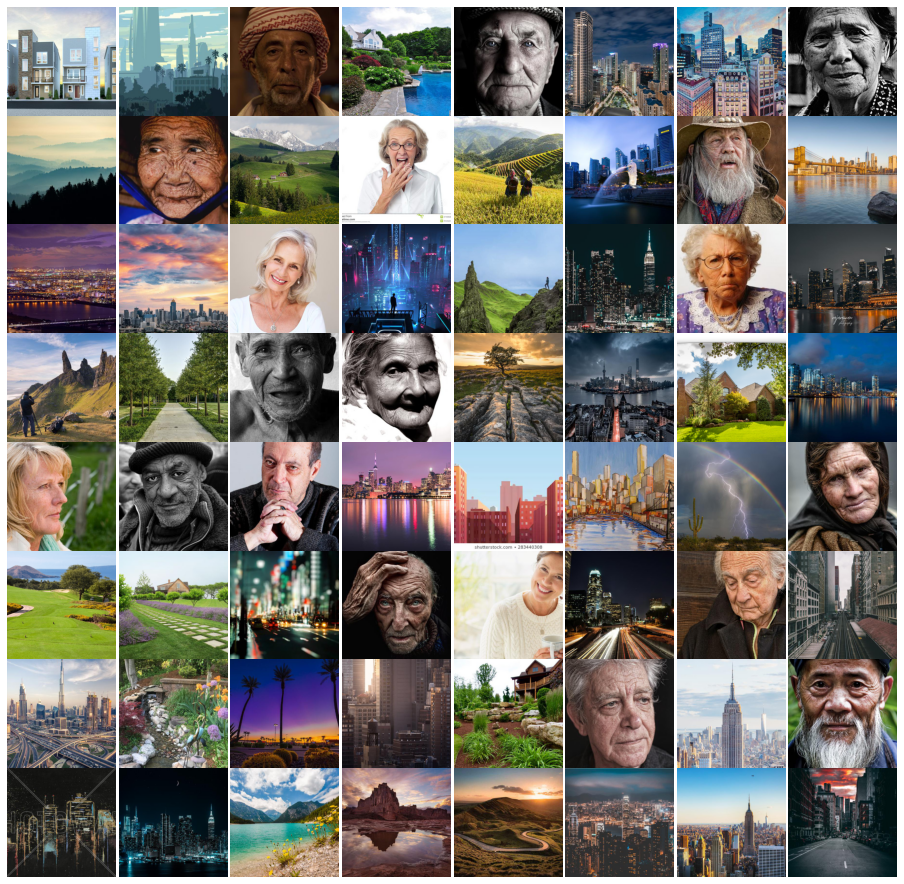

In [20]:
# double check via thumbnail (run it repeatly)
monty.bag.img_files = None
monty.draw.thumbnail_collage(wallaby.img_path)

---------------------------------------- : ----------------------------------------
 Image size (row/h, col/width, [chanel]) : (448, 448, 3)
                              Image mode : RGB
                           Channel value : 3
                        (top left 8x8) R : Value below...
                                       + : [206 207 207 208 207 207 206 206]
                                       + : [208 209 209 210 210 209 209 208]
                                       + : [210 211 212 212 212 212 211 211]
                                       + : [211 211 212 213 213 213 213 212]
                                       + : [210 210 211 212 213 213 213 212]
                                       + : [209 210 211 212 213 213 213 212]
                                       + : [209 210 211 212 213 214 214 213]
                                       + : [210 211 212 213 214 215 215 215]
                        (top left 8x8) B : Value below...
                                   

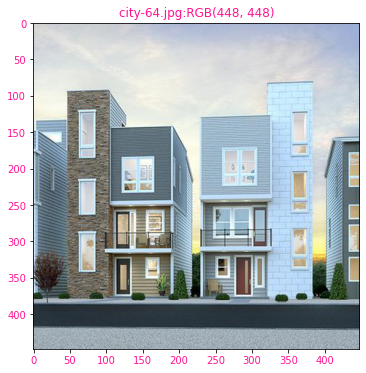

In [24]:
# inspect one photo at a time (run it repeatly)
wallaby.print_inspect_image()

- That is nice. All images are squared, the same size, centered, and neatly named, e.g., “city1.jpg, city2.jpg, face1.jpg, face2.jpg, land1.jpg, land2.jpg”, and so on. Thank you, Monty.

- Wallaby ready to dive into the heart of the journey. He will turn the 222 images into thousands of photos without compromised the subject.
 



## 2.7 | Flip | Augment Image Data

In [35]:
import fastai
import fastai.vision
import os
import PIL
#
#
# fetch PIL image from fastai image (copy from Monty)
@add_method(AUD3)
def fetch_fastai_img_2_pil_img(self, src):
  v1 = src.data.cpu().permute(1, 2, 0).numpy()
  v2 = v1 * 255
  v3 = v2.astype(numpy.uint8)
  return PIL.Image.fromarray(v3)
#
#
# fetch the canvas (copy from Snoopy or Monty)
@add_method(AUD3)
def fetch_graph_canvas(self, row=1,col=1,size=(12,9)):
  return matplotlib.pyplot.subplots(row, col, figsize=size)
#
#
# transfrom image (copy from Monty)
@add_method(AUD3)
def _draw_transform_img(self,name, tfms,rows=1, cols=6, width=18, height=6,tfms_index=0,**kwargs):
  # set up
  # tfms_index = 0 # zero = train, one = valid
  img = fastai.vision.open_image(name)
  canvas, pic = self.fetch_graph_canvas(row=rows,col=cols,size=(width,height))
  #
  if (rows == 1):
    for i in range(cols):
      pil_img = self.fetch_fastai_img_2_pil_img(img.apply_tfms(tfms[tfms_index], **kwargs))
      pic[i].imshow(pil_img)
  else:
    for j in range(rows):
      for i in range(cols):
        pil_img = self.fetch_fastai_img_2_pil_img(img.apply_tfms(tfms[tfms_index], **kwargs))
        pic[j,i].imshow(pil_img)
  #
  # the "block=False" forces the next print statement to wait for the image to show
  # i.e. the images will not display last (it display in the intended sequence.)
  matplotlib.pyplot.show(block=False)
  canvas.show()
  return
#
#
# random select an image
@add_method(AUD3)
def fetch_random_img(self, src_path):
  try:
    a = self.img_list[0]
  except:
    self.img_list = list()
    for root, dirs, files in os.walk(src_path):
      for file in files:
        self.img_list.append(pathlib.Path(root, file))
  idx = numpy.random.randint(0,len(self.img_list))
  return self.img_list[idx]

In [36]:
# flip image
@add_method(AUD3)
def draw_transform_flip(self,name, rows=1, cols=6, width=20, height=6,**kwargs):
  # set up
  t = fastai.vision.get_transforms(do_flip=True, flip_vert=False, p_affine=0,
    max_rotate=0,max_warp=0,max_zoom=0, max_lighting=0, p_lighting=0)
  # headers
  self._ph()
  self._pp("Transform Image", "Flip Horizontal Axis")
  self._pp("Probability for each image", "50% (Averaging 1 of 2 images)")
  self._pp("Augmentation images increase", "2 times (~e.g. was 100 now 200 images)")
  self._pp("Horizontal, \"do_flip\"", "True")
  self._pp("Hori. & Vert., \"flip_vert\"", "False")
  self._ph()
  #
  self._draw_transform_img(name,t,rows=rows,cols=cols,width=width,height=height, **kwargs)
  #
  # set up
  t = fastai.vision.get_transforms(do_flip=True, flip_vert=True, p_affine=0,
    max_rotate=0,max_warp=0,max_zoom=0, max_lighting=0, p_lighting=0)
  # headers
  self._ph()
  self._pp("Transform Image", "Flip Horizontal & Verticle Axis")
  self._pp("Probability for each image", "87.5% (Averaging 7 of 8 images)")
  self._pp("Augmentation images increase", "8 times (~e.g. was 100 now 800 images)")
  self._pp("Horizontal, \"do_flip\"", "True")
  self._pp("Hori. & Vert., \"flip_vert\"", "True")
  self._ph()
  #
  self._draw_transform_img(name,t,rows=rows,cols=cols,width=width,height=height, **kwargs)
  return
#

In [ ]:
# reset the internal list
wallaby.img_list = None 

---------------------------------------- : ----------------------------------------
                         Transform Image : Flip Horizontal Axis
              Probability for each image : 50% (Averaging 1 of 2 images)
            Augmentation images increase : 2 times (~e.g. was 100 now 200 images)
                   Horizontal, "do_flip" : True
              Hori. & Vert., "flip_vert" : False
---------------------------------------- : ----------------------------------------


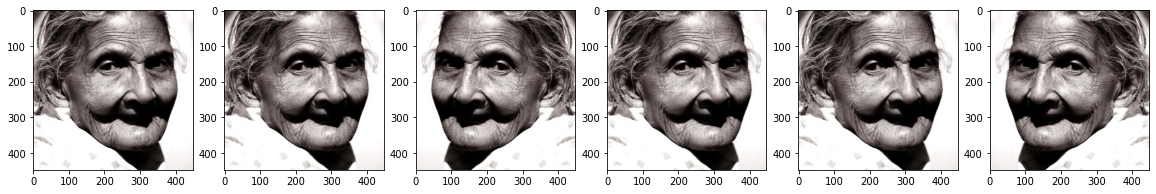

---------------------------------------- : ----------------------------------------
                         Transform Image : Flip Horizontal & Verticle Axis
              Probability for each image : 87.5% (Averaging 7 of 8 images)
            Augmentation images increase : 8 times (~e.g. was 100 now 800 images)
                   Horizontal, "do_flip" : True
              Hori. & Vert., "flip_vert" : True
---------------------------------------- : ----------------------------------------


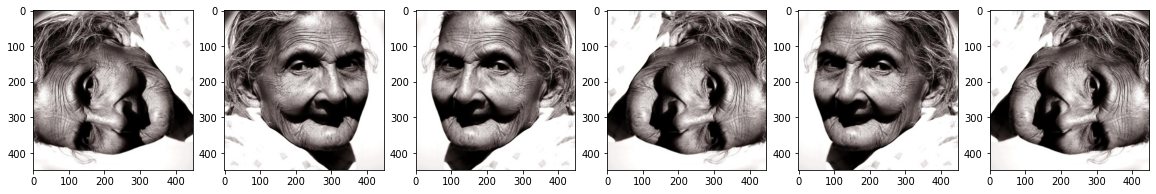

In [38]:
# flip faces it (run it repeatly)
wallaby.draw_transform_flip(wallaby.fetch_random_img(wallaby.img_path.joinpath("faces")))

- a

In [40]:
# reset the internal list
wallaby.img_list = None 

---------------------------------------- : ----------------------------------------
                         Transform Image : Flip Horizontal Axis
              Probability for each image : 50% (Averaging 1 of 2 images)
            Augmentation images increase : 2 times (~e.g. was 100 now 200 images)
                   Horizontal, "do_flip" : True
              Hori. & Vert., "flip_vert" : False
---------------------------------------- : ----------------------------------------


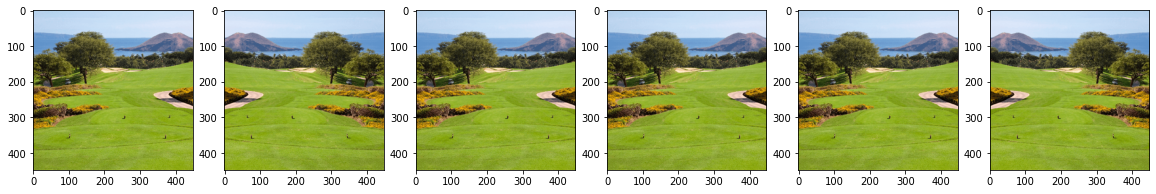

---------------------------------------- : ----------------------------------------
                         Transform Image : Flip Horizontal & Verticle Axis
              Probability for each image : 87.5% (Averaging 7 of 8 images)
            Augmentation images increase : 8 times (~e.g. was 100 now 800 images)
                   Horizontal, "do_flip" : True
              Hori. & Vert., "flip_vert" : True
---------------------------------------- : ----------------------------------------


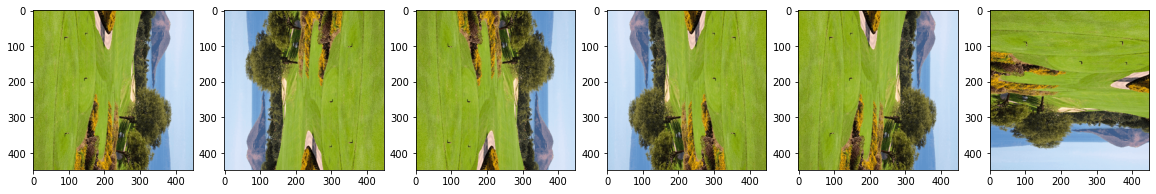

In [43]:
# flip landscape it (run it repeatly)
wallaby.draw_transform_flip(wallaby.fetch_random_img(wallaby.img_path.joinpath("landscape")))

- a 

In [44]:
# reset the internal list
wallaby.img_list = None 

---------------------------------------- : ----------------------------------------
                         Transform Image : Flip Horizontal Axis
              Probability for each image : 50% (Averaging 1 of 2 images)
            Augmentation images increase : 2 times (~e.g. was 100 now 200 images)
                   Horizontal, "do_flip" : True
              Hori. & Vert., "flip_vert" : False
---------------------------------------- : ----------------------------------------


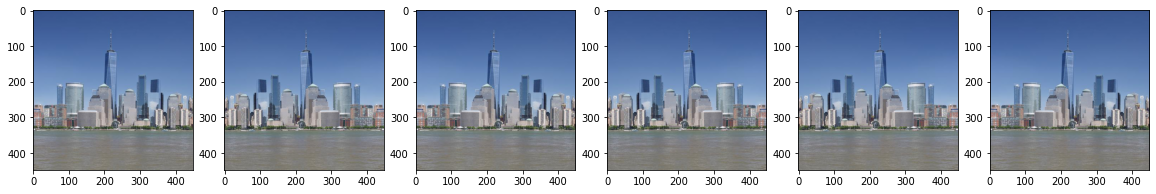

---------------------------------------- : ----------------------------------------
                         Transform Image : Flip Horizontal & Verticle Axis
              Probability for each image : 87.5% (Averaging 7 of 8 images)
            Augmentation images increase : 8 times (~e.g. was 100 now 800 images)
                   Horizontal, "do_flip" : True
              Hori. & Vert., "flip_vert" : True
---------------------------------------- : ----------------------------------------


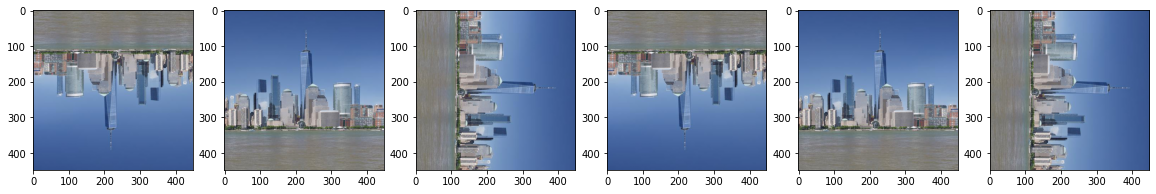

In [46]:
# flip landscape it (run it repeatly)
wallaby.draw_transform_flip(wallaby.fetch_random_img(wallaby.img_path.joinpath("cityscape")))

## 2.8 Milestone

- Henna is happy to see the milestone mark. She has completed the AUD3 journey, except for a quick detour to hyper-parameters.

- At the beginning of the journey, we promised to show Henna how the movie reviews affect the hyper-parameters. 

In [ ]:
#

## 2.10 Wrap Up 

- a

# 3 | Conclusion




- a

In [ ]:
# end of jupyter notebook

# 4 | Demystify AI Series

1. a

2. a